### Loan Application Status Prediction

##### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading dataset
loan_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# checking for column names and dimensions
print(loan_data.columns)
print()
print("Shape of the Dataset :", loan_data.shape)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Shape of the Dataset : (614, 13)


Dataset contains 614 rows with 13 columns. The target variable is 'Loan_Status'.

In [5]:
# summary of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The count is not same for all the columns, suggesting presence of null values. Dataset contains two types of data-- numerical(float, int) and categorical(object).

In [6]:
loan_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001356,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


1. Loan_ID has 614 unique values, and there are no missing values.
2. Gender has 601 non-missing values, with "Male" being the most common gender. 
3. Married has 611 non-missing values, with "Yes" being the most common marital status.
4. Dependents has 599 non-missing values, with "0" being the most common value.
5. Education has 614 values, with "Graduate" being the most common.
6. Self_Employed has 582 non-missing values, with "No" being the most common value.
7. ApplicantIncome represent the income of the applicants. The mean income is around 5403.46, with a relatively high standard deviation of 6109.04. The range of incomes is quite wide, from 150 to 81000.
8. CoapplicantIncome represents the income of coapplicants. The mean coapplicant income is around 1621.25, with a standard deviation of 2926.25.
9. LoanAmount column represents the loan amount. The mean loan amount is approximately 146.412, with a standard deviation of 85.5873. The range of loan amounts is from 9 to 700.
10. Loan_Amount_Term represents the term of the loan in months. The most common term is 360 months (30 years), and the standard deviation is 65.1204.
11. Credit_History represent the credit history of the applicants. The mean credit history value is around 0.842, indicating that a high proportion of applicants have a credit history.
12. Property_Area represents the area where the property is located. "Semiurban" is the most common property area.
13. Loan_Status is the target variable indicating whether the loan was approved ("Y") or not ("N"). The dataset is slightly imbalanced towards approved loans.

In [7]:
# missing values in each column
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Credit_History column has the highest number of missing values. Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property_Area, and Loan_Status columns have no missing values.

In [8]:
# dropping the loan_id column
loan_data = loan_data.drop('Loan_ID', axis=1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


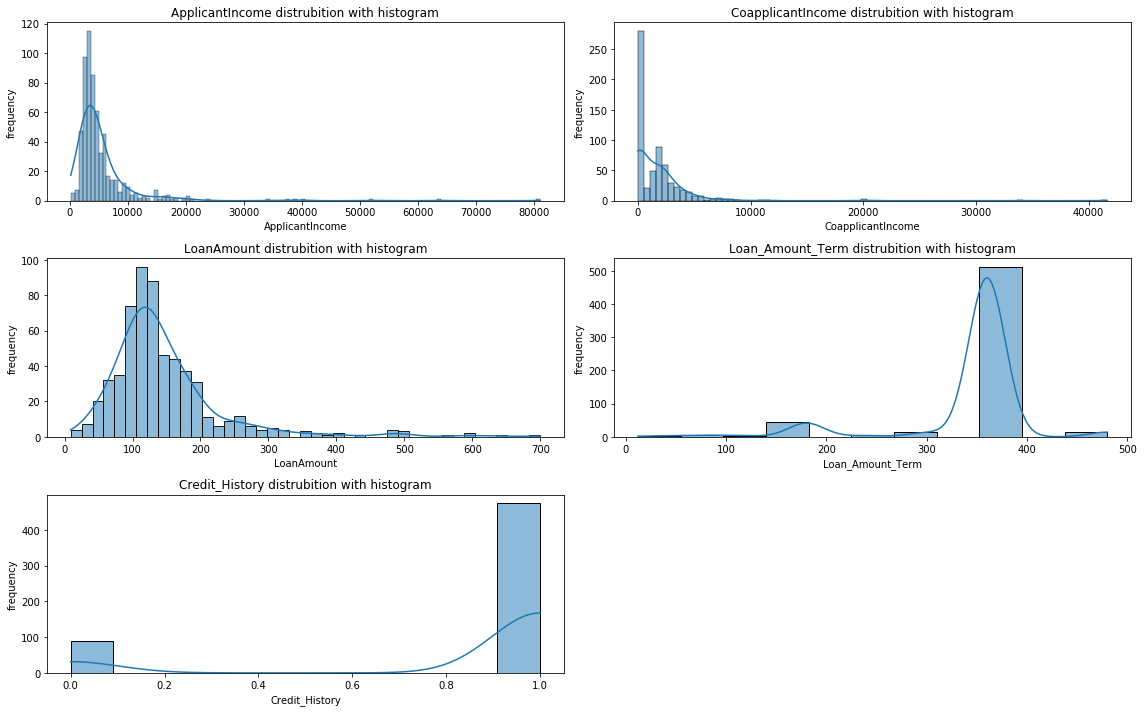

In [9]:
# Data Visualization
# Univariate Analysis of numerical columns

num = loan_data.select_dtypes(include='number').columns # selecting the numerical columns from the dataset

# Plotting histograms
plt.figure(figsize=(16,10))
for i, col in enumerate(num):
    plt.subplot(3,2, i+1)
    sns.histplot(data=loan_data, x=loan_data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.title("{} distrubition with histogram".format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

1. Most of the applicants have income in the range of 0-10000. Most of the coapplicants have income less than 10000.
2. A large of applicants have asked for a loan of amount less than 200. For loan amount greater than 200, the number of applicants are less.
3. Most of the applicants have loan term between 350-400 months.
4. Most of the applicants have credit history meaning they were able to pay their previous loans.

GENDER--
Male      489
Female    112
Name: Gender, dtype: int64

MARRIED--
Yes    398
No     213
Name: Married, dtype: int64

DEPENDENTS--
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

EDUCATION--
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

SELF_EMPLOYED--
No     500
Yes     82
Name: Self_Employed, dtype: int64

PROPERTY_AREA--
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

LOAN_STATUS--
Y    422
N    192
Name: Loan_Status, dtype: int64



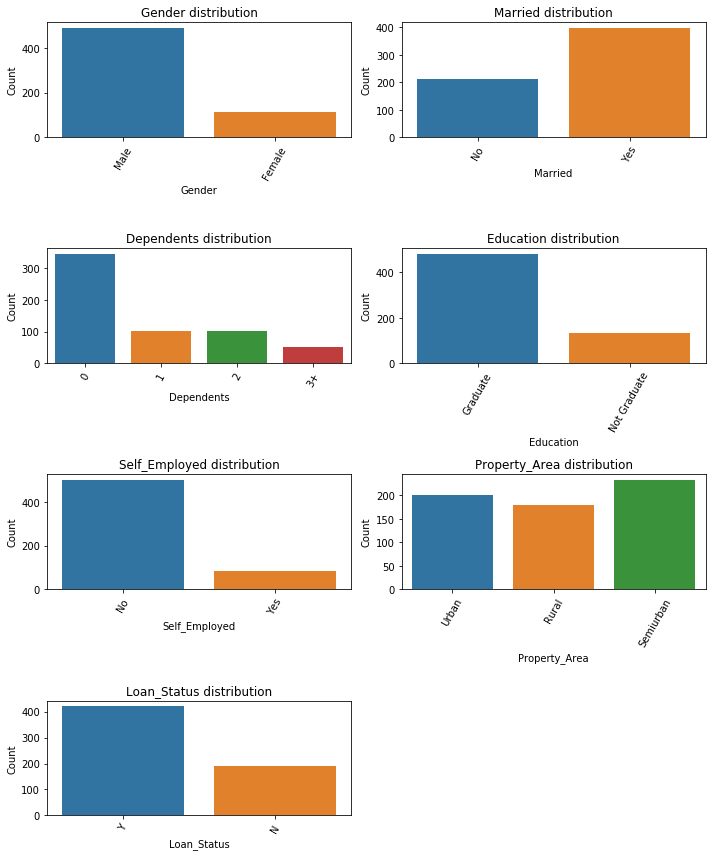

In [10]:
for i in loan_data.columns:
    if loan_data[i].dtype=='object':
        print(i.upper()+"--")
        print(loan_data[i].value_counts())
        print()
        

# data visualization

# selecting all the categorical columns
cat = loan_data.select_dtypes(include='object').columns

# Plotting barplots
plt.figure(figsize=(10, 12))
for i, col in enumerate(cat):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=loan_data, x=loan_data[col])
    plt.xticks(rotation=60)
    plt.ylabel("Count")
    plt.title("{} distribution".format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

1. Most of the applicants are male (489), while there are 112 female applicants.
2. More applicants are married (398) compared to those who are not (213).
3. Most applicants have 0 dependents (345), followed by 1 dependent (102), 2 dependents (101), and 51 applicants with 3 or more dependents.
4. A larger number of applicants are graduates (480) compared to non-graduates (134).
5. The majority of applicants are not self-employed (500), while only 82 are self-employed.
6. The property areas are distributed among Semiurban (233), Urban (202), and Rural (179).
7. A larger proportion of loans have been approved (422) compared to those that have not been approved (192). This makes the target variable imbalanced.

In [11]:
# lets find what percent of apllicants get their loan approved
percent = (loan_data['Loan_Status'].value_counts()/loan_data['Loan_Status'].value_counts().sum())*100
percent

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

68% of people get their loan approved thus confirming that the data is imbalanced.

Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


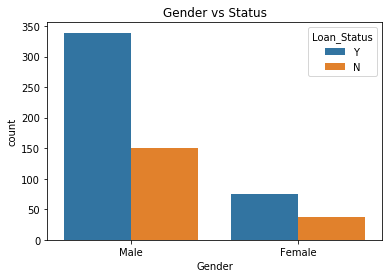

In [12]:
# plotting each attribute against the target variable

print(loan_data['Gender'].value_counts())
print('*'*40)
subscribed = pd.crosstab(loan_data['Gender'], loan_data['Loan_Status'])
print(subscribed)

sns.countplot(loan_data, x='Gender', hue='Loan_Status')
plt.title("Gender vs Status")
plt.show()

There are more male applicants (489) and the proportion of approved loans is relatively higher for them as well.

Yes    398
No     213
Name: Married, dtype: int64
****************************************
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


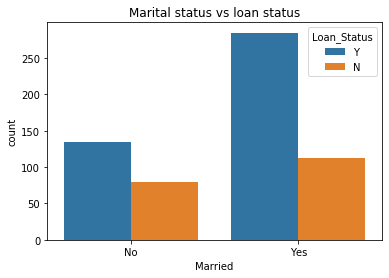

In [13]:
# plotting marital status vs loan status

print(loan_data['Married'].value_counts())
print('*'*40)
subscribed = pd.crosstab(loan_data['Married'], loan_data['Loan_Status'])
print(subscribed)

sns.countplot(loan_data, x='Married', hue='Loan_Status')
plt.title('Marital status vs loan status')
plt.show()

There are more married applicants (398) and the proportion of approved loans is relatively higher for them.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


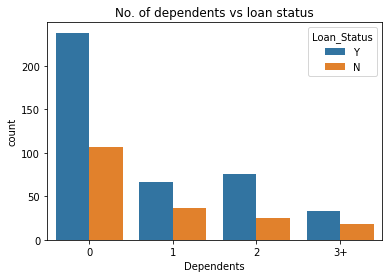

In [14]:
# plotting dependents vs loan status

print(loan_data['Dependents'].value_counts())
print('*'*40)
subscribed = pd.crosstab(loan_data['Dependents'], loan_data['Loan_Status'])
print(subscribed)

sns.countplot(loan_data, x='Dependents', hue='Loan_Status')
plt.title('No. of dependents vs loan status')
plt.show()

Most applicants have 0 dependents (345). The proportion of approved loans is higher for applicants with 0 or 2 dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


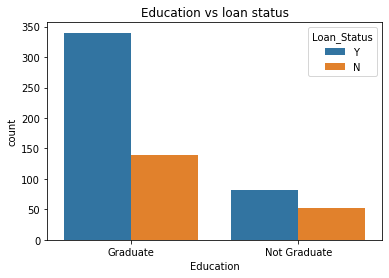

In [15]:
# plotting education vs loan status

print(loan_data['Education'].value_counts())
print('*'*40)
subscribed = pd.crosstab(loan_data['Education'], loan_data['Loan_Status'])
print(subscribed)

sns.countplot(loan_data, x='Education', hue='Loan_Status')
plt.title('Education vs loan status')
plt.show()

There are more graduate applicants (480) compared to non-graduate applicants. The proportion of approved loans is higher for graduates.

No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


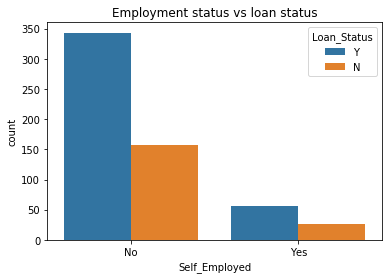

In [16]:
# plotting employment status vs loan status

print(loan_data['Self_Employed'].value_counts())
print('*'*40)
subscribed = pd.crosstab(loan_data['Self_Employed'], loan_data['Loan_Status'])
print(subscribed)

sns.countplot(loan_data, x='Self_Employed', hue='Loan_Status')
plt.title('Employment status vs loan status')
plt.show()

Most applicants are not self-employed (50). Loans are approved for both self-employed (56) and non-self-employed (343) applicants. The proportion of approved loans is higher for non-self-employed applicants.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
****************************************
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


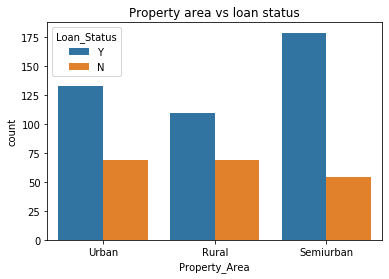

In [17]:
# plotting property area vs loan status

print(loan_data['Property_Area'].value_counts())
print('*'*40)
subscribed = pd.crosstab(loan_data['Property_Area'], loan_data['Loan_Status'])
print(subscribed)

sns.countplot(loan_data, x='Property_Area', hue='Loan_Status')
plt.title('Property area vs loan status')
plt.show()

Loans are approved for all property areas, with Semiurban having the highest number of approved loans (179).

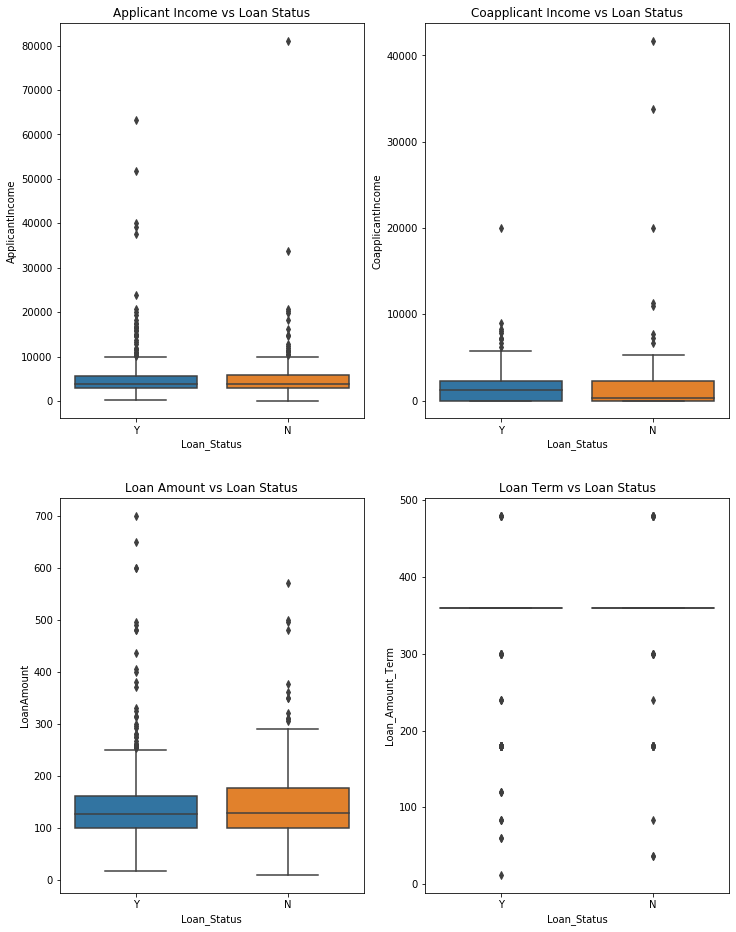

In [18]:
plt.figure(figsize=(12,16))

plt.subplot(2,2,1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data)
plt.title('Applicant Income vs Loan Status')

plt.subplot(2,2,2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=loan_data)
plt.title('Coapplicant Income vs Loan Status')

plt.subplot(2,2,3)
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_data)
plt.title('Loan Amount vs Loan Status')

plt.subplot(2,2,4)
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=loan_data)
plt.title('Loan Term vs Loan Status')

plt.show()

1. The distribution of applicant incomes does not seem to vary significantly between approved and not approved loans. The median incomes are similar, and there are potential outliers in both cases, suggesting that there is considerable variability in incomes for both loan approval statuses.
2. Similar to applicant income, the distribution of coapplicant incomes appears to be quite similar between approved and not approved loans. There is a wide range of coapplicant incomes, but the similarity in summary statistics between loan approval statuses suggests that coapplicant income alone might not be a strong predictor of loan approval.
3. The distribution of loan amounts varies slightly between loan approval statuses. The similarity in mean and standard deviation between loan statuses suggests that loan amount alone might not be the sole determinant of loan approval.
4. There seems to be minimal difference in loan term distributions between loan approval statuses. The similarity in summary statistics suggests that loan term might not be a major factor differentiating loan approval statuses.

In [19]:
# since the number of missing values is small, we will use imputation method to deal with missing values
from sklearn.impute import SimpleImputer

# Columns for imputation
categorical_columns = ['Gender', 'Married', 'Self_Employed','Dependents']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term','Credit_History']

# Impute categorical columns with mode
loan_data[categorical_columns] = SimpleImputer(strategy='most_frequent').fit_transform(loan_data[categorical_columns])

# Impute numerical columns with mean
loan_data[numerical_columns] = SimpleImputer(strategy='mean').fit_transform(loan_data[numerical_columns])


In [20]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
# using label encoder to convert categorical column to numerical in train data
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns in your dataset
cat_columns = ['Gender', 'Married', 'Education', 'Property_Area','Dependents','Self_Employed','Loan_Status']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Display the updated dataset
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


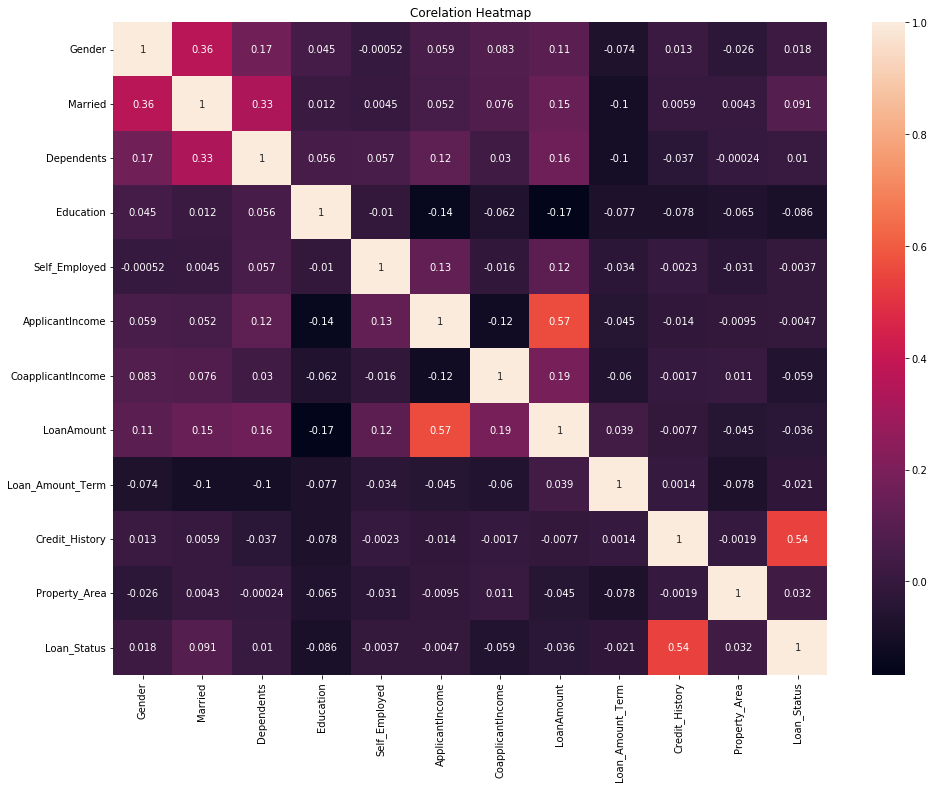

In [22]:
# lets check for correlation among columns

plt.figure(figsize=(16,12))
sns.heatmap(loan_data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [23]:
loan_data.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [24]:
X=loan_data.drop('Loan_Status', axis=1)
y=loan_data['Loan_Status']

In [25]:
# checking for skewness in data
X.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

In [26]:
# Apply power transformation to remove skewness

for col in X.columns:
    X[col] = np.cbrt(X[col])

# Check the updated skewness after transformation
updated_skewness = X.skew()
print(updated_skewness)

Gender              -1.648795
Married             -0.644850
Dependents           0.453698
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Property_Area       -0.775470
dtype: float64


In [27]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (429, 11)
X_test shape (185, 11)
y_train shape (429,)
y_test shape (185,)


We have seen that the data in the target variable is imbalanced. We will increase the number of samples in the minority classes by replicating or generating synthetic samples. By doing so, oversampling aims to balance the class distribution and improve the model's ability to learn from the minority class. Here we will use SMOTE method for oversampling.

In [29]:
# oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (604, 11)
X_test shape (185, 11)
y_train shape (604,)
y_test shape (185,)


In [31]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('SVM', SVC()),
    ('NaiveBayes', GaussianNB()),
    ('LogisticRegression', LogisticRegression())]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


[[30 35]
 [57 63]]
              precision    recall  f1-score   support

           0       0.34      0.46      0.39        65
           1       0.64      0.53      0.58       120

   micro avg       0.50      0.50      0.50       185
   macro avg       0.49      0.49      0.49       185
weighted avg       0.54      0.50      0.51       185

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[[23 42]
 [45 75]]
              precision    recall  f1-score   support

           0       0.34      0.35      0.35

1. Logistic Regression and Naive Bayes have the highest accuracy among the models.
2. Naive Bayes, Random Forest, and Logistic Regression perform well across both accuracy and other metrics like F1-score, precision, and recall. This suggests that they might be more balanced and reliable choices for your dataset.


In [32]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.66935484 0.66129032 0.66393443 0.60655738 0.6147541 ]
Mean Score 0.6431782125859333
Difference between accuracy and cv score is:  -0.05939442880214951


Model : DecisionTree
cv_score : [0.63709677 0.58064516 0.57377049 0.64754098 0.63114754]
Mean Score 0.6140401903754628
Difference between accuracy and cv score is:  -0.03025640659167894


Model : RandomForest
cv_score : [0.64516129 0.65322581 0.66393443 0.6147541  0.67213115]
Mean Score 0.6498413537810682
Difference between accuracy and cv score is:  -0.0660575699972844


Model : AdaBoost
cv_score : [0.65322581 0.63709677 0.67213115 0.62295082 0.68852459]
Mean Score 0.654785827604442
Difference between accuracy and cv score is:  -0.07100204382065822


Model : SVM
cv_score : [0.68548387 0.68548387 0.68852459 0.68852459 0.68852459]
Mean Score 0.6873083024854574
Difference between accuracy and cv score is:  -0.10352451870167356


Model : NaiveBayes
cv_score : [0.68548387 0.65322581 0.68852459 0.66393443 0.

1. DecisionTree, RandomForest, and AdaBoost have relatively smaller differences between accuracy and cross-validation scores. This indicates more stable and consistent generalization performance.
2. SVM, NaiveBayes, and LogisticRegression have larger differences between accuracy and cross-validation scores. This suggests that these models might be overfitting the training data or have some instability in their generalization.

**It seems that the Logistic Regression model performs relatively well. It has a reasonably(0.58) good accuracy, F1-score, precision, recall, and cross-validation score(0.685). The difference between accuracy and cross-validation score is also relatively smaller compared to some other models.**

In [33]:
# Hyper parameter tuning

# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
# Get the best parameters and the best score
print("best_params",grid_search.best_params_)
print()
print("best_score",grid_search.best_score_)

best_params {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

best_score 0.5910596026490066


In [35]:
# final model
final = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,final_pred)*100)

Accuracy_final : 57.2972972972973


Area : 0.6006410256410256


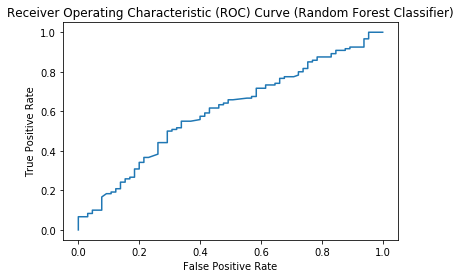

AUC_Score : 0.5791666666666666


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# calculating predicted probabilities for the positive class
y_pred_probs = final.predict_proba(X_test)[:, 1]

#Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr,tpr)
print("Area :",roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest Classifier)')
plt.show()

# Calculate the AUC-ROC score using roc_auc_score
auc_score = roc_auc_score(y_test, final_pred)
print("AUC_Score :",auc_score)

In [37]:
# saving the model
import joblib
joblib.dump(final, "Loan_Prediction.pkl")

['Loan_Prediction.pkl']

In [38]:
# predicting on the X_test with the saved model
#loading the aved model
model = joblib.load("Loan_Prediction.pkl")

# prediction
prediction = model.predict(X_test)
prediction[:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [39]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y_test})
pred.head(10)

,predicted,actual
350,1,1
377,1,1
163,0,1
609,0,1
132,0,1
578,0,1
316,1,1
2,1,1
340,0,0
77,1,0
